In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from pathlib import Path
home_dir = str(Path.home())
work_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Aging Decision Making R01')

In [217]:
cr = pd.read_csv(os.path.join(work_dir, 'Data/CR/circadian_rhythms_2019-09-07.csv'), index_col= ['record_id'])
neuro = pd.read_csv(os.path.join(work_dir, 'Data/Neuropsych/AgingDecMemNeuropsyc_Data_2019-06-12_0708.csv'), index_col= ['record_id'])

In [228]:
data = pd.merge(cr, neuro, on='record_id')
data['group'] = np.where(data.index > 40000, 1, 0)

ya = data[data['group'] == 0]
oa = data[data['group'] == 1]

oa[:5]

,IS,IV,RA,L5,L5_starttime,M10,M10_starttime,actamp,actbeta,actphi,...,cowat_perseveration,cowat_errors,time_trails_a,error_trails_a,trails_a_z_score,time_trails_b,error_trails_b,trails_b_z_score,neuropsych_scoring_complete,group
record_id,,,,,,,,,,,,,,,,,,,,,
40160,0.60,0.62,0.95,5.58,02:36:00,231.23,10:04:00,2.027264,4.374406,16.244675,...,0.0,1.0,32,0,-0.097701,57,0,0.407746,2,1
40170,0.25,0.38,0.96,2.65,23:42:00,117.65,06:35:00,1.089745,12.964754,14.437002,...,0.0,0.0,37,0,-0.472347,79,0,-1.276047,2,1
40288,0.69,0.86,0.97,2.59,00:06:00,172.20,07:48:00,1.719326,8.604564,14.435157,...,0.0,1.0,35,0,-0.528736,71,1,-0.345347,2,1
40351,0.38,0.62,0.94,7.21,00:21:30,243.01,09:41:30,1.830074,3.348847,15.552881,...,3.0,0.0,26,0,0.764368,67,0,-0.130178,2,1
40490,0.28,0.67,0.82,15.14,02:07:00,153.88,09:14:00,1.467991,6.713236,16.547778,...,0.0,0.0,34,0,0.423343,55,0,1.299128,2,1


In [150]:
cr.describe()

,IS,IV,RA,L5,M10,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,fact,fnlrgact
count,118.000000,118.000000,118.000000,118.000000,118.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.430508,0.881949,0.833983,14.174322,159.158729,1.515115,10.128882,15.567073,0.155668,0.913226,7.736980,23.397165,-0.463099,0.652508,0.338459,4016.637966,1348.865587
std,0.139889,0.262731,0.142374,12.695402,49.958685,0.265629,13.579006,1.676752,0.176451,0.164841,1.919604,1.926720,0.211713,0.078487,0.111710,1912.638570,931.262917
min,0.030000,0.380000,0.170000,0.000000,34.580000,1.000000,0.917830,10.540381,0.000000,0.500000,2.720587,17.092822,-1.000000,0.097674,0.034020,178.354827,-2112.073417
25%,0.342500,0.670000,0.810000,6.067500,124.575000,1.370325,4.745231,14.435157,0.000000,0.799705,6.393213,22.298732,-0.576427,0.626454,0.270173,2664.890258,650.999011
50%,0.440000,0.870000,0.870000,10.370000,158.675000,1.529356,7.316000,15.552881,0.108436,0.909233,7.703897,23.289428,-0.482476,0.659378,0.352939,3913.007634,1322.183276
75%,0.527500,1.047500,0.927500,15.530000,186.562500,1.702508,10.351960,16.595117,0.227220,0.991673,8.804953,24.618560,-0.399628,0.692864,0.410946,5079.685201,1984.367813
max,0.790000,1.660000,1.000000,66.690000,291.280000,2.104373,132.499163,19.572871,0.763577,1.315812,14.748639,28.509097,0.953289,0.793920,0.570141,9548.039421,3778.972007


In [151]:
cvlt = neuro.filter(like='cvlt', axis=1).dropna()
cvlt.describe()

,cvlt_1,cvlt_1r,cvlt_1i,cvlt_2,cvlt_2r,cvlt_2i,cvlt_3,cvlt_3r,cvlt_3i,cvlt_4,...,cvlt_ldelay_recall_zscore,cvlt_ldelay_cue_recall,cvlt_ldelay_cue_recall_r,cvlt_ldelay_cue_recall_i,cvlt_ldelay_cue_recall_zscore,cvlt_recognition_hits,cvlt_recognition_hits_zscore,cvlt_recognition_fp,cvlt_recognition_fp_zscore,cvlt_zscore
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,6.173913,0.043478,0.289855,9.376812,0.333333,0.188406,10.826087,0.666667,0.188406,11.884058,...,0.471014,11.463768,0.086957,1.028986,0.297101,14.318841,-0.275362,2.608696,-0.195652,0.156729
std,1.671179,0.267603,0.545070,2.503535,0.798282,0.462581,2.733004,1.461935,0.493349,2.741491,...,0.988478,2.794847,0.283836,1.360915,0.971350,1.744679,1.139325,2.931660,0.916424,0.801559
min,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,...,-2.000000,4.000000,0.000000,0.000000,-2.000000,8.000000,-4.000000,0.000000,-1.000000,-2.100000
25%,5.000000,0.000000,0.000000,8.000000,0.000000,0.000000,9.000000,0.000000,0.000000,10.000000,...,0.000000,10.000000,0.000000,0.000000,-0.500000,14.000000,-1.000000,0.000000,-1.000000,-0.300000
50%,6.000000,0.000000,0.000000,9.000000,0.000000,0.000000,11.000000,0.000000,0.000000,12.000000,...,0.500000,12.000000,0.000000,1.000000,0.500000,15.000000,0.000000,1.000000,-0.500000,0.200000
75%,7.000000,0.000000,0.000000,11.000000,0.000000,0.000000,13.000000,1.000000,0.000000,14.000000,...,1.000000,13.000000,0.000000,1.000000,1.000000,16.000000,0.500000,3.000000,0.500000,0.700000
max,11.000000,2.000000,2.000000,15.000000,5.000000,2.000000,16.000000,9.000000,3.000000,16.000000,...,2.500000,16.000000,1.000000,7.000000,2.500000,16.000000,2.000000,11.000000,3.000000,1.900000


In [221]:
df = pd.merge(cr, cvlt, on='record_id')

In [185]:
X = df.loc[:,'cvlt_sumtrials':'cvlt_zscore']
y = df['IS']

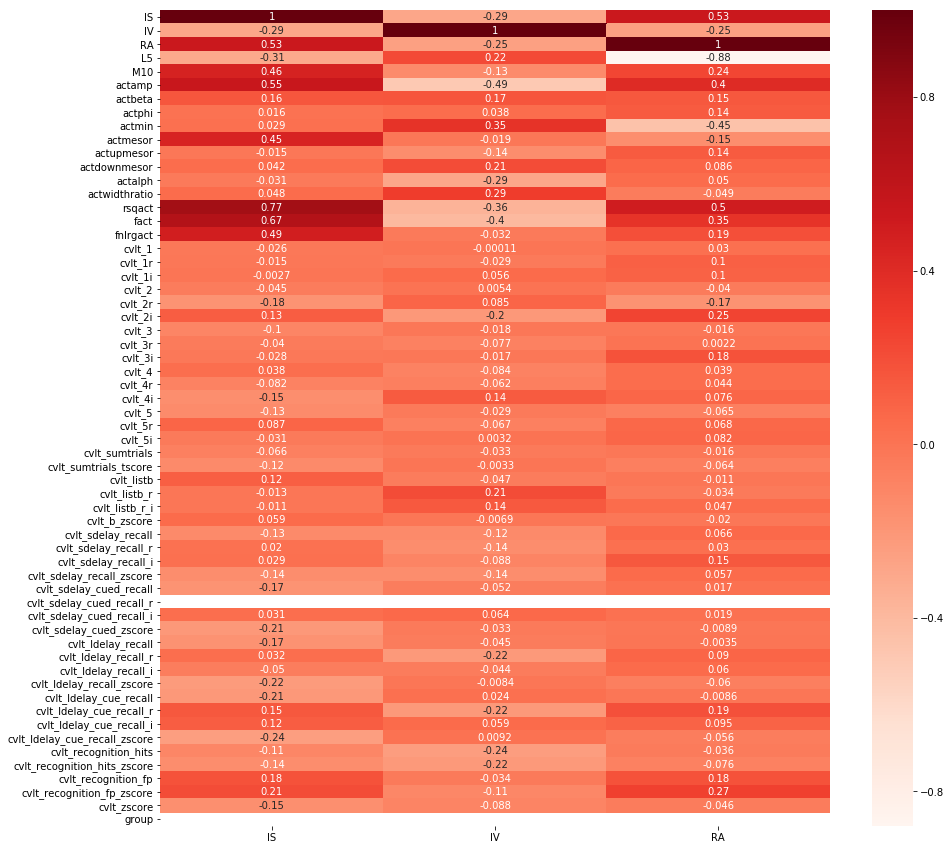

In [178]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor[['IS', 'IV', 'RA']], annot=True, cmap=plt.cm.Reds)
plt.show()

[Statistics in Python](https://scipy-lectures.org/packages/statistics/index.html)

In [238]:
cr.columns.tolist()

['IS',
 'IV',
 'RA',
 'L5',
 'L5_starttime',
 'M10',
 'M10_starttime',
 'actamp',
 'actbeta',
 'actphi',
 'actmin',
 'actmesor',
 'actupmesor',
 'actdownmesor',
 'actalph',
 'actwidthratio',
 'rsqact',
 'fact',
 'fnlrgact']

In [249]:
from scipy import stats

print('Interdaily stability *************')
print(stats.ttest_ind(ya['IS'], oa['IS'], nan_policy='omit', equal_var=False))

print('\nIntradaily variability')
print(stats.ttest_ind(ya['IV'], oa['IV'], nan_policy='omit', equal_var=False))

print('\nRelative amplitude')
print(stats.ttest_ind(ya['RA'], oa['RA'], nan_policy='omit', equal_var=False))

print('\nAmplitude *************')
print(stats.ttest_ind(ya['actamp'], oa['actamp'], nan_policy='omit', equal_var=False))

print('\nBeta')
print(stats.ttest_ind(ya['actbeta'], oa['actbeta'], nan_policy='omit', equal_var=False))

print('\nAcrophase *************')
print(stats.ttest_ind(ya['actphi'], oa['actphi'], nan_policy='omit', equal_var=False))

print('\nMinimum')
print(stats.ttest_ind(ya['actmin'], oa['actmin'], nan_policy='omit', equal_var=False))

print('\nUp-mesor *************')
print(stats.ttest_ind(ya['actupmesor'], oa['actupmesor'], nan_policy='omit', equal_var=False))

print('\nDown-mesor *************')
print(stats.ttest_ind(ya['actdownmesor'], oa['actdownmesor'], nan_policy='omit', equal_var=False))

print('\nWidth ratio')
print(stats.ttest_ind(ya['actwidthratio'], oa['actwidthratio'], nan_policy='omit', equal_var=False))

print('\nF-statistic')
print(stats.ttest_ind(ya['fact'], oa['fact'], nan_policy='omit', equal_var=False))

Interdaily stability *************
Ttest_indResult(statistic=-3.3717634613531438, pvalue=0.0010406742147033487)

Intradaily variability
Ttest_indResult(statistic=0.9126833896326945, pvalue=0.3633697926452094)

Relative amplitude
Ttest_indResult(statistic=-0.2999655233626737, pvalue=0.764794261891024)

Amplitude *************
Ttest_indResult(statistic=2.000372626052862, pvalue=0.04790807338258588)

Beta
Ttest_indResult(statistic=-2.245478145933716, pvalue=0.02822510722020043)

Acrophase *************
Ttest_indResult(statistic=5.907273625798121, pvalue=3.908125227094766e-08)

Minimum
Ttest_indResult(statistic=-0.7836109651742248, pvalue=0.43493931441389677)

Up-mesor *************
Ttest_indResult(statistic=3.9074042227045367, pvalue=0.00016082631197344635)

Down-mesor *************
Ttest_indResult(statistic=6.1673746727754235, pvalue=1.171116839111776e-08)

Width ratio
Ttest_indResult(statistic=1.7279407125791975, pvalue=0.08694506727609469)

F-statistic
Ttest_indResult(statistic=-0.7124